## Create an API Key with Yelp 

You can go to the Yelp fusion page and create an app. <br>You can give it any name
and it will give you an API key. Save this key into a variable.

<img src="./Yelp.png" width=560 height=560, align="left" />

In [455]:
import requests

### Endpoints

The Yelp Fusion site gives us all the endpoints - they are just ways to communicate
with Yelp.

https://www.yelp.ca/developers/documentation/v3

In [456]:
# Define the API key, define the endpoint, define the header

In [457]:
API_KEY = "TkpZ7BzkQmRG32BoDJ2GN0GhrrbXe93asSjtBhD8t6tRp_o6TvW27t4rhdQHwhjfHJfG-hioapLukJQgiCid3vdlXUgSQrkrfO-hxaDBzsQYOpe_IIsvW7ab1eFDX3Yx"

In [458]:
ENDPOINT = "https://api.yelp.com/v3/businesses/search"

In [459]:
# Send this with our request
HEADERS = {"Authorization": 'bearer %s' % API_KEY}

### Longitutde and Latitude

There's many ways to get the longitude and latitude of Colombia University. <br>
You can use goepy etc, but I just looked it up. We only use it once.

In [460]:
# Hardcode the parameters for now
PARAMETERS = {'term': 'restaurant',
              'latitude': 40.8079488,
              'longitude': -73.96179735775709,
              'radius_filter': '200',
              'limit': '10'}

In [461]:
# Make a request to Yelp API
response = requests.get(url = ENDPOINT, params=PARAMETERS, headers=HEADERS)

In [462]:
# Convert json string into interable dictionary
restaurant_data = response.json()

### List the restaurants

Here are the names of the restaurants with 200 m.

In [463]:
# Check names of restaurants
for restaurants in restaurant_data['businesses']:
    print(restaurants['name'])

The Tang - Upper West Side
Nobody Told Me
Ajo & Oregano
Elysian Fields Cafe
Massawa
Jacob's Pickles
Calle Ocho
Mighty Catch
Moonrise Izakaya
Eataly Flatiron


In [464]:
# Let's put all the restaurant id's in one list
id_list = []
for restaurants in restaurant_data['businesses']:
    id_list.append(restaurants['id'])

### New Endpoints

There's another enpoint required to get the reviews of a restaurant - we can only get 3 
at a time. <br>This enpoint uses the id of the restaurants which we now know. I'll create the string
one by one to call each restaurant.

We can only pull up three reviews of each restaurant.
The new query string looks like this:<br><br>
https://api.yelp.com/v3/businesses/{id}/reviews<br><br>
So lets call it with each of the restaurant id's and only save the text
from the three reviews in a variable.



In [466]:
# Here we only capture the reviews
review_list = []
for r_id in id_list:
    s_end = 'https://api.yelp.com/v3/businesses/' + r_id + '/reviews'
    reviews = requests.get(url = s_end, headers=HEADERS)
    rest_rev = reviews.json()
    for rest_text in rest_rev['reviews']:
        review_list.append(rest_text['text'])

### Wordclouds

Let's create a wordcloud using the three reviews from each of these restaurants.

In [467]:
texts = review_list
import wikipedia
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

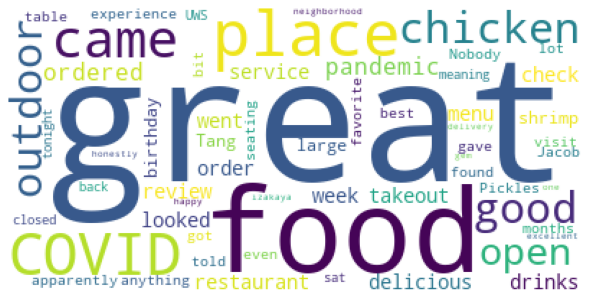

In [468]:
cloud = WordCloud(background_color='white', max_words=60).generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Conclusion

It looks like the reviews are positive. It's hard to find a negative word in the cloud and the word that is most frequent is the word "great"